#  HOSPITAL-LENGTH OF STAY

This is to predict patients length of stay based on patient demographics and health conditions, for an optimized resource distribution across facilities - such as beds and staff, based on predicted patient length of stay (LOS)

In [1]:
pip install pandas numpy matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
a = pd.read_csv("LengthOfStay.csv")
a

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,1/28/2012,3,M,0,0,0,0,0,0,...,171.422555,12.0,0.650323,30.063069,80,6.5,1,2/3/2012,B,6
99996,99997,8/6/2012,0,M,0,0,0,0,0,0,...,122.342450,12.0,1.521424,28.969548,61,6.5,1,8/7/2012,B,1
99997,99998,7/23/2012,1,M,0,0,1,0,0,0,...,108.288106,12.0,1.025677,26.354919,61,6.9,1,7/27/2012,C,4
99998,99999,12/19/2012,0,M,0,0,0,0,0,0,...,111.750731,16.0,1.035400,29.193462,59,5.6,1,12/23/2012,B,4


In [4]:
a.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4


In [5]:
a.tail()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
99995,99996,1/28/2012,3,M,0,0,0,0,0,0,...,171.422555,12.0,0.650323,30.063069,80,6.5,1,2/3/2012,B,6
99996,99997,8/6/2012,0,M,0,0,0,0,0,0,...,122.342450,12.0,1.521424,28.969548,61,6.5,1,8/7/2012,B,1
99997,99998,7/23/2012,1,M,0,0,1,0,0,0,...,108.288106,12.0,1.025677,26.354919,61,6.9,1,7/27/2012,C,4
99998,99999,12/19/2012,0,M,0,0,0,0,0,0,...,111.750731,16.0,1.035400,29.193462,59,5.6,1,12/23/2012,B,4
99999,100000,3/6/2012,0,F,0,0,0,0,0,0,...,149.572205,12.0,0.813004,25.175760,74,6.5,4,3/8/2012,B,2


In [6]:
a.describe()

,eid,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,50000.500000,0.036420,0.035270,0.094940,0.039450,0.063060,0.239040,0.051660,0.049390,0.004790,...,10.177455,137.891397,141.963384,14.097185,1.099350,29.805759,73.444720,6.493768,2.123310,4.00103
std,28867.657797,0.187334,0.184462,0.293134,0.194664,0.243072,0.426499,0.221341,0.216682,0.069044,...,5.353131,2.999669,29.992996,12.952454,0.200262,2.003769,11.644555,0.568473,2.050641,2.36031
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,124.912632,-1.005927,1.000000,0.219770,21.992683,21.000000,0.200000,0.000000,1.00000
25%,25000.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,135.871062,121.682383,11.000000,0.964720,28.454235,66.000000,6.500000,1.000000,2.00000
50%,50000.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.400000,137.887151,142.088545,12.000000,1.098764,29.807516,73.000000,6.500000,1.000000,4.00000
75%,75000.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.500000,139.912885,162.180996,14.000000,1.234867,31.156885,81.000000,6.500000,3.000000,6.00000
max,100000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,245.900000,151.387283,271.444277,682.500000,2.035202,38.935293,130.000000,10.000000,10.000000,17.00000


In [7]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  malnutrition   

In [8]:
b = a.fillna(method="ffill")
b

C:\Users\laswi\AppData\Local\Temp\ipykernel_2560\1304082951.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  b = a.fillna(method="ffill")


,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,1/28/2012,3,M,0,0,0,0,0,0,...,171.422555,12.0,0.650323,30.063069,80,6.5,1,2/3/2012,B,6
99996,99997,8/6/2012,0,M,0,0,0,0,0,0,...,122.342450,12.0,1.521424,28.969548,61,6.5,1,8/7/2012,B,1
99997,99998,7/23/2012,1,M,0,0,1,0,0,0,...,108.288106,12.0,1.025677,26.354919,61,6.9,1,7/27/2012,C,4
99998,99999,12/19/2012,0,M,0,0,0,0,0,0,...,111.750731,16.0,1.035400,29.193462,59,5.6,1,12/23/2012,B,4


In [9]:
# b.isnull()

In [10]:
b.columns

Index(['eid', 'vdate', 'rcount', 'gender', 'dialysisrenalendstage', 'asthma',
       'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor',
       'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo',
       'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro',
       'creatinine', 'bmi', 'pulse', 'respiration',
       'secondarydiagnosisnonicd9', 'discharged', 'facid', 'lengthofstay'],
      dtype='object')

#  LABEL ENCODER

In [11]:
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
c = LabelEncoder()
c

LabelEncoder()

In [12]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  malnutrition   

In [13]:
vdate1 = c.fit_transform(b['vdate'])
rcount2 = c.fit_transform(b['rcount'])
gender3 = c.fit_transform(b["gender"])
discharged4 = c.fit_transform(b["discharged"])
facid5 = c.fit_transform(b["facid"])

b.vdate=vdate1
b.rcount=rcount2
b.gender=gender3
b.discharged=discharged4
b.facid=facid5
b

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,327,0,0,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,348,1,3
1,2,232,5,0,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,267,0,7
2,3,351,1,0,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,365,1,3
3,4,336,0,0,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,318,0,1
4,5,105,0,0,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,120,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,21,3,1,0,0,0,0,0,0,...,171.422555,12.0,0.650323,30.063069,80,6.5,1,157,1,6
99996,99997,333,0,1,0,0,0,0,0,0,...,122.342450,12.0,1.521424,28.969548,61,6.5,1,345,1,1
99997,99998,290,1,1,0,0,1,0,0,0,...,108.288106,12.0,1.025677,26.354919,61,6.9,1,305,2,4
99998,99999,103,0,1,0,0,0,0,0,0,...,111.750731,16.0,1.035400,29.193462,59,5.6,1,119,1,4


#  CORRELATION

In [14]:
b.corr()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
eid,1.000000,-0.003071,0.001702,0.008509,0.001446,0.004973,-0.000310,0.002148,0.003328,0.009404,...,-0.002549,-0.000199,0.003292,0.002192,0.001136,0.006335,-0.002208,-0.004001,0.007006,0.001543
vdate,-0.003071,1.000000,0.004117,0.004518,0.000825,-0.001218,0.003330,0.000090,-0.006168,0.000936,...,0.003172,0.001451,0.002554,-0.006518,-0.001842,0.008058,-0.002473,0.933422,-0.001723,0.002753
rcount,0.001702,0.004117,1.000000,-0.007477,-0.002509,0.004394,-0.007634,-0.002675,0.000922,-0.004554,...,-0.003549,-0.006301,-0.003103,0.000951,0.004760,-0.001696,0.004233,0.001110,-0.004710,0.749514
gender,0.008509,0.004518,-0.007477,1.000000,0.074040,-0.061761,0.102153,0.056246,0.048870,0.147810,...,-0.005316,0.121508,0.004357,-0.001546,0.003599,0.053056,0.000375,0.004253,0.134528,0.069575
dialysisrenalendstage,0.001446,0.000825,-0.002509,0.074040,1.000000,-0.005340,0.157381,0.120472,0.049925,0.085162,...,-0.003199,0.272239,-0.000372,0.003331,0.003802,-0.043435,0.003251,-0.002309,0.157396,0.169695
asthma,0.004973,-0.001218,0.004394,-0.061761,-0.005340,1.000000,0.020001,0.058444,-0.005668,0.026300,...,0.000641,-0.005675,-0.001479,-0.000597,0.006473,0.001910,-0.001108,-0.001662,0.177249,0.082005
irondef,-0.000310,0.003330,-0.007634,0.102153,0.157381,0.020001,1.000000,0.151320,0.082848,0.127544,...,-0.000598,0.149846,-0.010980,-0.005841,0.002803,-0.047849,0.006194,0.000451,0.268995,0.193838
pneum,0.002148,0.000090,-0.002675,0.056246,0.120472,0.058444,0.151320,1.000000,0.076131,0.089732,...,-0.000981,0.064899,-0.001437,0.000650,0.005045,-0.055898,0.000590,-0.001186,0.213995,0.135461
substancedependence,0.003328,-0.006168,0.000922,0.048870,0.049925,-0.005668,0.082848,0.076131,1.000000,0.081762,...,0.001923,0.073065,0.002481,-0.001434,0.002433,-0.058826,-0.000814,-0.003653,0.327803,0.147886
psychologicaldisordermajor,0.009404,0.000936,-0.004554,0.147810,0.085162,0.026300,0.127544,0.089732,0.081762,1.000000,...,-0.003387,0.073234,-0.000066,-0.000749,0.000377,0.065988,0.005916,-0.001320,0.713436,0.286724


In [15]:
d = b.drop(['eid','vdate','discharged'], axis = 1)
d

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,facid,lengthofstay
0,0,0,0,0,0,0,0,0,0,0,...,140.361132,192.476918,12.0,1.390722,30.432418,96,6.5,4,1,3
1,5,0,0,0,0,0,0,0,0,0,...,136.731692,94.078507,8.0,0.943164,28.460516,61,6.5,1,0,7
2,1,0,0,0,0,0,0,0,0,0,...,133.058514,130.530524,12.0,1.065750,28.843812,64,6.5,2,1,3
3,0,0,0,0,0,0,0,0,0,0,...,138.994023,163.377028,12.0,0.906862,27.959007,76,6.5,1,0,1
4,0,0,0,0,0,1,0,1,0,0,...,138.634836,94.886654,11.5,1.242854,30.258927,67,5.6,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3,1,0,0,0,0,0,0,0,0,...,132.614977,171.422555,12.0,0.650323,30.063069,80,6.5,1,1,6
99996,0,1,0,0,0,0,0,0,0,0,...,138.327320,122.342450,12.0,1.521424,28.969548,61,6.5,1,1,1
99997,1,1,0,0,1,0,0,0,0,0,...,136.695905,108.288106,12.0,1.025677,26.354919,61,6.9,1,2,4
99998,0,1,0,0,0,0,0,0,1,0,...,135.980516,111.750731,16.0,1.035400,29.193462,59,5.6,1,1,4


#  TRAIN TEST SPLIT

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x = d[['rcount', 'gender', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother','fibrosisandother', 'malnutrition', 'hemo', 'hematocrit', 'neutrophils','sodium', 'glucose',	'bloodureanitro', 'creatinine',	'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9',	'facid' ]]
x

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,facid
0,0,0,0,0,0,0,0,0,0,0,...,14.20,140.361132,192.476918,12.0,1.390722,30.432418,96,6.5,4,1
1,5,0,0,0,0,0,0,0,0,0,...,4.10,136.731692,94.078507,8.0,0.943164,28.460516,61,6.5,1,0
2,1,0,0,0,0,0,0,0,0,0,...,8.90,133.058514,130.530524,12.0,1.065750,28.843812,64,6.5,2,1
3,0,0,0,0,0,0,0,0,0,0,...,9.40,138.994023,163.377028,12.0,0.906862,27.959007,76,6.5,1,0
4,0,0,0,0,0,1,0,1,0,0,...,9.05,138.634836,94.886654,11.5,1.242854,30.258927,67,5.6,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3,1,0,0,0,0,0,0,0,0,...,9.30,132.614977,171.422555,12.0,0.650323,30.063069,80,6.5,1,1
99996,0,1,0,0,0,0,0,0,0,0,...,9.30,138.327320,122.342450,12.0,1.521424,28.969548,61,6.5,1,1
99997,1,1,0,0,1,0,0,0,0,0,...,7.70,136.695905,108.288106,12.0,1.025677,26.354919,61,6.9,1,2
99998,0,1,0,0,0,0,0,0,1,0,...,8.20,135.980516,111.750731,16.0,1.035400,29.193462,59,5.6,1,1


In [18]:
y = d["lengthofstay"]
y

0        3
1        7
2        3
3        1
4        4
        ..
99995    6
99996    1
99997    4
99998    4
99999    2
Name: lengthofstay, Length: 100000, dtype: int64

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)
xtrain,xtest,ytrain,ytest

(       rcount  gender  dialysisrenalendstage  asthma  irondef  pneum  \
 75220       3       1                      0       0        0      0   
 48955       5       1                      0       0        0      0   
 44966       4       0                      0       0        0      0   
 13568       0       1                      0       0        0      0   
 92727       4       0                      0       0        0      0   
 ...       ...     ...                    ...     ...      ...    ...   
 6265        0       1                      0       0        0      0   
 54886       4       0                      0       0        0      0   
 76820       5       0                      0       0        0      0   
 860         0       0                      0       0        0      0   
 15795       0       1                      0       0        0      0   
 
        substancedependence  psychologicaldisordermajor  depress  psychother  \
 75220                    0               

#  LOGISTIC REGRESSION

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
e = LogisticRegression()
e

LogisticRegression()

In [22]:
e.fit(xtrain,ytrain)

C:\Users\laswi\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
e.score(xtest,ytest)

0.3593

In [24]:
e.predict(xtest)

array([3, 1, 1, ..., 3, 5, 3], dtype=int64)

#  DECISION TREE CLASSIFIER

In [25]:
j = tree.DecisionTreeClassifier()
j.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [26]:
j.score(xtest,ytest)

0.6328

In [27]:
j.predict(xtest)

array([4, 1, 3, ..., 3, 7, 3], dtype=int64)

#  RANDOM FOREST CLASSIFIER

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
k = RandomForestClassifier(n_estimators = 60)
k.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=60)

In [30]:
k.score(xtest,ytest)

0.63345

In [31]:
k.predict(xtest)

array([4, 1, 3, ..., 3, 7, 3], dtype=int64)

#  K-NEIGHBORS CLASSIFIER

In [32]:
from sklearn.neighbors import KNeighborsClassifier
l = KNeighborsClassifier(n_neighbors = 4)

In [33]:
l.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=4)

In [34]:
l.score(xtest,ytest)

0.2927

In [35]:
l.predict(xtest)

array([1, 1, 2, ..., 3, 3, 3], dtype=int64)

#  NAIVE BAYES

In [36]:
from sklearn.naive_bayes import GaussianNB
m = GaussianNB()

In [37]:
m.fit(xtrain,ytrain)

GaussianNB()

In [38]:
m.score(xtest,ytest)

0.36415

In [39]:
m.predict(xtest)

array([3, 1, 1, ..., 3, 6, 5], dtype=int64)

#  XG BOOST

In [40]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [41]:
from xgboost import XGBClassifier
le = LabelEncoder()
ytrain_enc = le.fit_transform(ytrain)
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(xtrain, ytrain_enc)

C:\Users\laswi\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\core.py:158: UserWarning: [15:27:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [42]:
ytest_ = le.transform(ytest)
ytest_

array([3, 0, 1, ..., 2, 8, 2], dtype=int64)

In [43]:
y_pred_ = model.predict(xtest)
y_pred_

array([3, 0, 2, ..., 2, 7, 2], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(ytest_, y_pred_)
print("Accuracy:", acc)


Accuracy: 0.67305


In [45]:
from sklearn.metrics import classification_report

print(classification_report(ytest_, y_pred_))


              precision    recall  f1-score   support

           0       0.88      0.89      0.88      3563
           1       0.63      0.78      0.70      2552
           2       0.68      0.69      0.69      3225
           3       0.64      0.64      0.64      3027
           4       0.63      0.59      0.61      2442
           5       0.61      0.60      0.60      2014
           6       0.63      0.59      0.61      1498
           7       0.53      0.48      0.50       915
           8       0.37      0.27      0.31       431
           9       0.36      0.13      0.19       200
          10       0.35      0.10      0.16        89
          11       0.00      0.00      0.00        26
          12       1.00      0.07      0.13        14
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1

    accuracy                           0.67     20000
   macro avg       0.46   

C:\Users\laswi\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\laswi\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\laswi\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [46]:
pip install seaborn keras jupyter

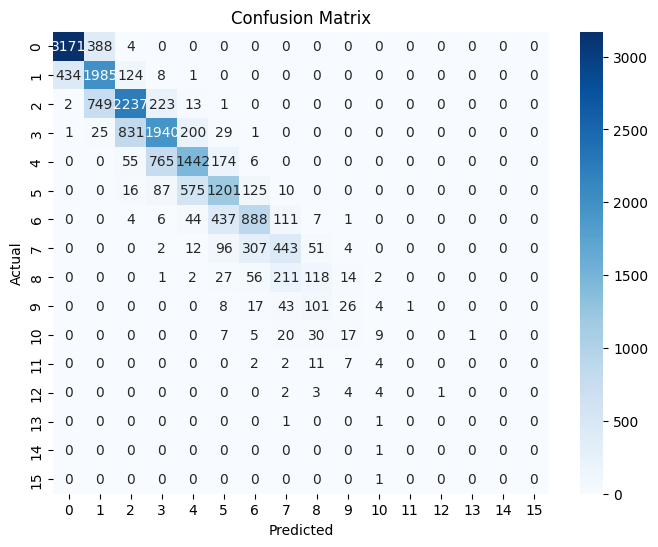

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(ytest_, y_pred_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#  VISUALISATION

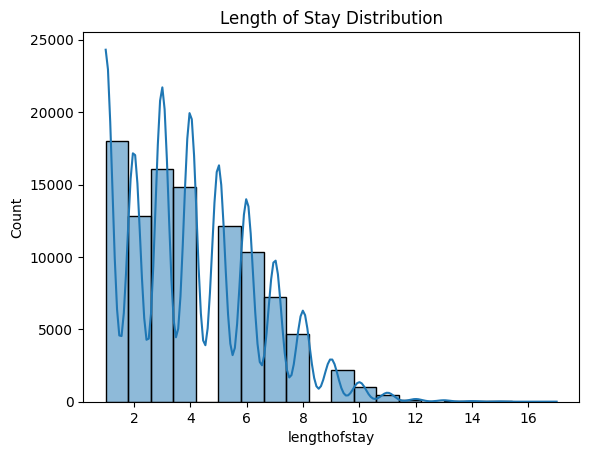

In [48]:
sns.histplot(b['lengthofstay'], bins=20, kde=True)
plt.title("Length of Stay Distribution")
plt.show()

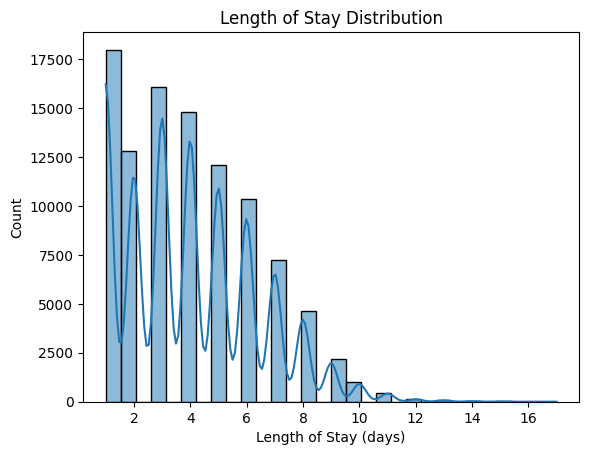

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(b['lengthofstay'], bins=30, kde=True)
plt.title("Length of Stay Distribution")
plt.xlabel("Length of Stay (days)")
plt.ylabel("Count")
plt.show()

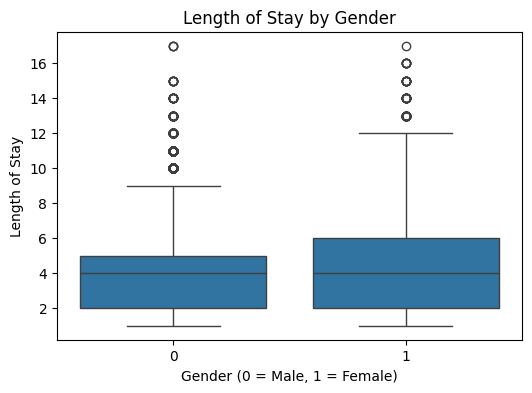

In [50]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='gender', y='lengthofstay', data=b)
plt.title('Length of Stay by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Length of Stay')
plt.show()

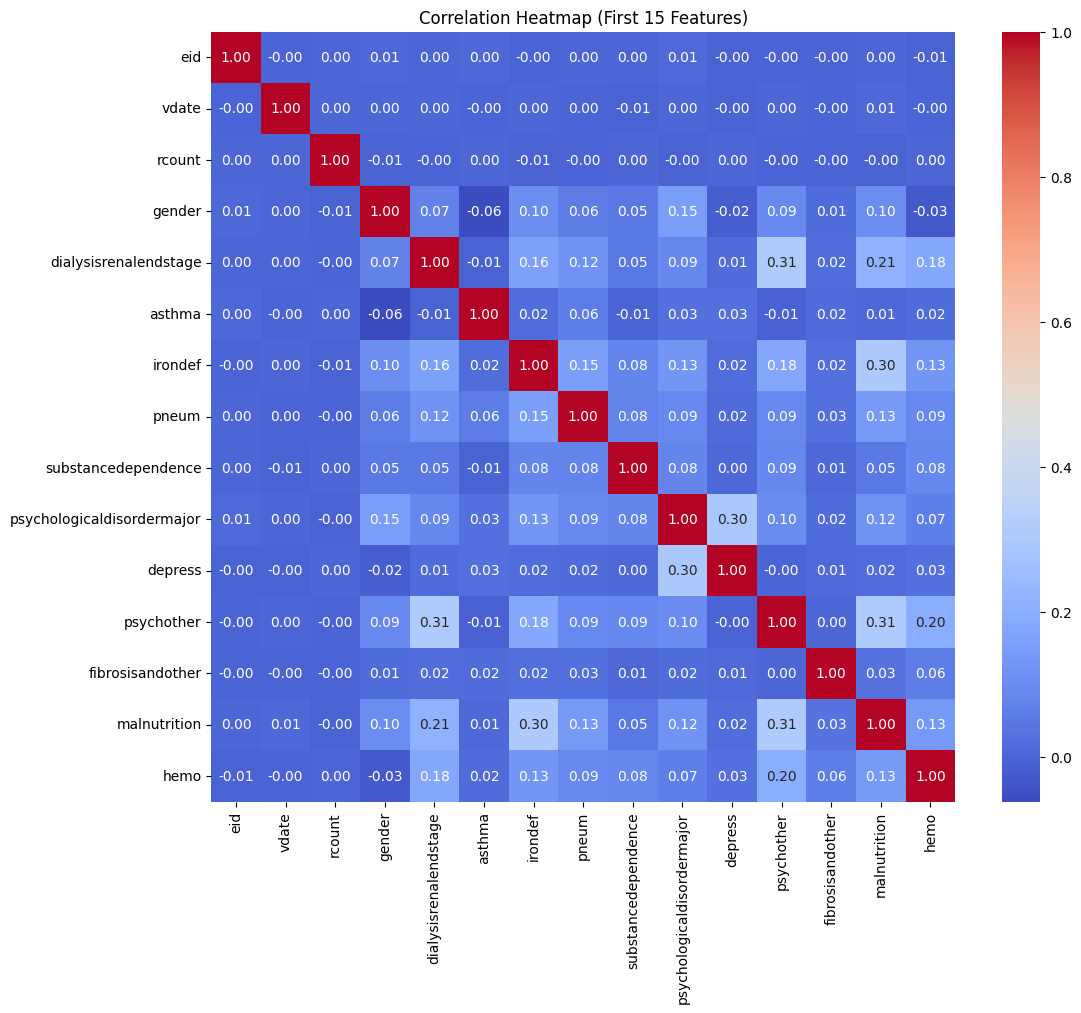

In [51]:
plt.figure(figsize=(12, 10))
corr = b.corr(numeric_only=True)
sns.heatmap(corr.iloc[:15, :15], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (First 15 Features)')
plt.show()

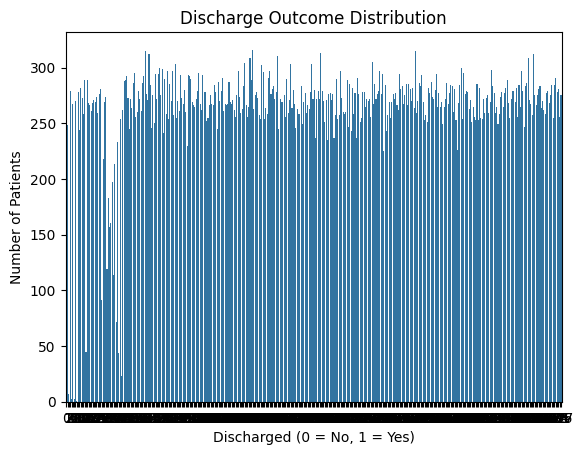

In [52]:
sns.countplot(x='discharged', data=b)
plt.title('Discharge Outcome Distribution')
plt.xlabel('Discharged (0 = No, 1 = Yes)')
plt.ylabel('Number of Patients')
plt.show()

#  DL

In [53]:
X = b.drop(columns=['lengthofstay'])
y = b['lengthofstay'] 

In [54]:
y

0        3
1        7
2        3
3        1
4        4
        ..
99995    6
99996    1
99997    4
99998    4
99999    2
Name: lengthofstay, Length: 100000, dtype: int64

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [56]:
X_scaled

array([[-1.73203349,  1.358462  , -0.72472187, ...,  0.91517715,
         1.44699151, -0.46048011],
       [-1.73199885,  0.46234205,  2.51582269, ..., -0.54778767,
         0.68911134, -1.06695754],
       [-1.73196421,  1.5848502 , -0.07661295, ..., -0.06013273,
         1.60605278, -0.46048011],
       ...,
       [ 1.73196421,  1.00944686, -0.07661295, ..., -0.54778767,
         1.04466006,  0.14599731],
       [ 1.73199885, -0.75449451, -0.72472187, ..., -0.54778767,
        -0.69565736, -0.46048011],
       [ 1.73203349, -0.02816571, -0.72472187, ...,  0.91517715,
        -0.00327301, -0.46048011]])

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [58]:
X_train, X_test, y_train, y_test

(array([[ 0.87366375, -0.67903178,  1.21960487, ...,  1.40283209,
         -0.61144846, -0.46048011],
        [-0.03618254, -1.00918123,  2.51582269, ...,  0.91517715,
         -0.929571  , -1.06695754],
        [-0.17436555,  0.31141659,  1.86771378, ..., -0.54778767,
          0.3709888 , -1.06695754],
        ...,
        [ 0.92908937, -0.16022549,  2.51582269, ...,  0.91517715,
         -0.05941228, -1.06695754],
        [-1.70224221,  1.49995462, -0.72472187, ..., -0.54778767,
          1.52184387, -1.06695754],
        [-1.18487864,  1.43392473, -0.72472187, ...,  3.35345186,
          1.43763496, -1.06695754]]),
 array([[ 0.8910189 , -1.32989785, -0.72472187, ...,  0.91517715,
         -1.26640663,  1.35895216],
        [ 1.04562175,  0.15105828, -0.72472187, ...,  0.91517715,
          0.1651448 , -0.46048011],
        [-1.04392434,  1.70747714, -0.72472187, ...,  2.37814197,
          1.71833132, -1.06695754],
        ...,
        [-0.42045533,  1.20753654, -0.72472187, ...,  

In [59]:
# !pip install tensorflow

In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Dropout

In [61]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(1)  
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [63]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
2000/2000 [==============================] - 4s 2ms/step - loss: 1.3000 - mae: 0.8073 - val_loss: 0.8508 - val_mae: 0.6318
Epoch 2/50
2000/2000 [==============================] - 3s 2ms/step - loss: 0.9061 - mae: 0.6896 - val_loss: 0.7230 - val_mae: 0.6110
Epoch 3/50
2000/2000 [==============================] - 3s 2ms/step - loss: 0.8158 - mae: 0.6536 - val_loss: 0.6656 - val_mae: 0.5731
Epoch 4/50
2000/2000 [==============================] - 3s 2ms/step - loss: 0.7459 - mae: 0.6270 - val_loss: 0.6136 - val_mae: 0.5595
Epoch 5/50
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6945 - mae: 0.6051 - val_loss: 0.5629 - val_mae: 0.5370
Epoch 6/50
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6572 - mae: 0.5862 - val_loss: 0.5518 - val_mae: 0.5283
Epoch 7/50
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6237 - mae: 0.5687 - val_loss: 0.5126 - val_mae: 0.5033
Epoch 8/50
2000/2000 [==============================] - 3s 2ms

In [64]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")

625/625 [==============================] - 1s 1ms/step - loss: 0.3338 - mae: 0.3943
Test MAE: 0.39434176683425903


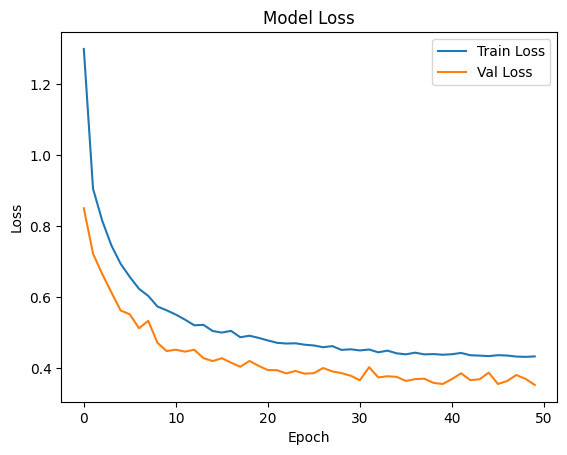

In [65]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [66]:
y_pred = model.predict(X_test)


625/625 [==============================] - 1s 842us/step


In [68]:
# from sklearn.metrics import mean_squared_error, r2_score

# rmse = mean_squared_error(y_test, y_pred, squared=False)
# r2 = r2_score(y_test, y_pred)

# print(f"RMSE: {rmse:.2f}")
# print(f"R² Score: {r2:.2f}")

In [69]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 0.58
R² Score: 0.94
